In [4]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

In [6]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_count = 0
set_count = 1

In [7]:
print("Starting to Retrieve Data")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list fill in variables listed
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
    
        else:
            index_count = index_count + 1
            
        print(f"Processing Record {index_count} of Set {set_count} : {city}") 
  
    except(KeyError, IndexError):
        print("A city was not found")

print("-----------------------------")
print("Complete")
print("-----------------------------")

Starting to Retrieve Data
-----------------------------
A city was not found
A city was not found
A city was not found
Processing Record 1 of Set 1 : petropavlovsk-kamchatskiy
Processing Record 2 of Set 1 : christchurch
Processing Record 3 of Set 1 : vila franca do campo
Processing Record 4 of Set 1 : barrow
Processing Record 5 of Set 1 : los pozos
Processing Record 6 of Set 1 : port alfred
Processing Record 7 of Set 1 : san patricio
Processing Record 8 of Set 1 : muisne
Processing Record 9 of Set 1 : mataura
Processing Record 10 of Set 1 : castro
Processing Record 11 of Set 1 : orhei
Processing Record 12 of Set 1 : chiredzi
Processing Record 13 of Set 1 : darhan
Processing Record 14 of Set 1 : kruisfontein
Processing Record 15 of Set 1 : port keats
Processing Record 16 of Set 1 : leningradskiy
Processing Record 17 of Set 1 : biak
Processing Record 18 of Set 1 : samarai
Processing Record 19 of Set 1 : salta
Processing Record 20 of Set 1 : punta arenas
Processing Record 21 of Set 1 : yu

Processing Record 35 of Set 4 : nanortalik
Processing Record 36 of Set 4 : bilibino
Processing Record 37 of Set 4 : zaysan
Processing Record 38 of Set 4 : kodinsk
A city was not found
Processing Record 39 of Set 4 : bethel
Processing Record 40 of Set 4 : kavieng
Processing Record 41 of Set 4 : dabeiba
Processing Record 42 of Set 4 : cherskiy
Processing Record 43 of Set 4 : mae chan
Processing Record 44 of Set 4 : ewa beach
Processing Record 45 of Set 4 : gat
Processing Record 46 of Set 4 : bengkulu
Processing Record 47 of Set 4 : nome
Processing Record 48 of Set 4 : kulhudhuffushi
Processing Record 49 of Set 4 : warrnambool
Processing Record 50 of Set 4 : oranzherei
Processing Record 0 of Set 5 : port macquarie
A city was not found
Processing Record 1 of Set 5 : hami
Processing Record 2 of Set 5 : kodiak
Processing Record 3 of Set 5 : batsfjord
Processing Record 4 of Set 5 : tuy hoa
Processing Record 5 of Set 5 : ostersund
Processing Record 6 of Set 5 : khatanga
Processing Record 7 of 

Processing Record 25 of Set 8 : palmer
Processing Record 26 of Set 8 : ayagoz
A city was not found
Processing Record 27 of Set 8 : dessalines
Processing Record 28 of Set 8 : grand-lahou
A city was not found
Processing Record 29 of Set 8 : north bend
Processing Record 30 of Set 8 : kenai
Processing Record 31 of Set 8 : aksu
Processing Record 32 of Set 8 : numan
A city was not found
Processing Record 33 of Set 8 : panguna
Processing Record 34 of Set 8 : shingu
Processing Record 35 of Set 8 : yatou
A city was not found
Processing Record 36 of Set 8 : palu
Processing Record 37 of Set 8 : malanje
Processing Record 38 of Set 8 : gasa
Processing Record 39 of Set 8 : kahului
Processing Record 40 of Set 8 : hoopstad
Processing Record 41 of Set 8 : coquimbo
Processing Record 42 of Set 8 : wad madani
Processing Record 43 of Set 8 : paraiso
Processing Record 44 of Set 8 : san cristobal
Processing Record 45 of Set 8 : suntar
Processing Record 46 of Set 8 : road town
Processing Record 47 of Set 8 : 

In [14]:

# Create a panda data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

In [15]:

# Count data
weather_df.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [16]:

# Display the Data Frame
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Petropavlovsk-Kamchatskiy,90,RU,1619894927,100,53.0452,158.6483,32.00,1.74
1,Christchurch,0,NZ,1619894571,100,-43.5333,172.6333,30.20,2.30
2,Vila Franca do Campo,75,PT,1619894635,88,37.7167,-25.4333,60.80,10.36
3,Barrow,90,US,1619894464,86,71.2906,-156.7887,21.20,10.36
4,Los Pozos,100,VE,1619894928,43,8.4518,-62.7268,90.50,11.16
...,...,...,...,...,...,...,...,...,...
533,Buenos Aires,0,AR,1619895070,64,-34.6132,-58.3772,78.80,4.61
534,Duvan,100,RU,1619895075,56,55.6950,57.9024,52.32,17.47
535,Port-Gentil,20,GA,1619895075,79,-0.7193,8.7815,84.20,6.91
536,Kota Kinabalu,20,MY,1619895075,94,5.9749,116.0724,77.00,4.61


In [20]:
weather_df.to_csv("output_data_cities.csv", index = False)

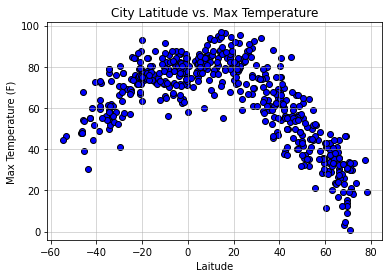

In [23]:

# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig('city_lat_vs_temp.png')

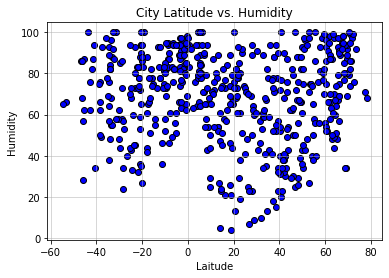

In [24]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig('city_lat_vs_humid.png')

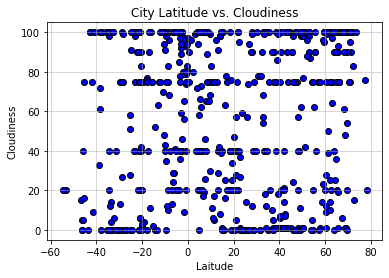

In [25]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig('city_lat_vs_cloud.png')

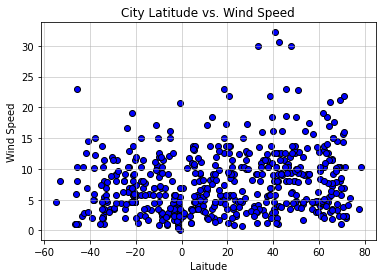

In [26]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig('city_lat_vs_windspd.png')

In [32]:
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [60]:
def linear_reg(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

The r-squared is: -0.8808385038678358


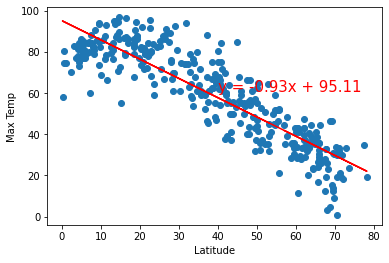

None


In [61]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp")
print(linear_reg(x_values,y_values))

In [ ]:
#Note that as the Latitude moves northward the max temperature lowers

The r-squared is: 0.6806126560695828


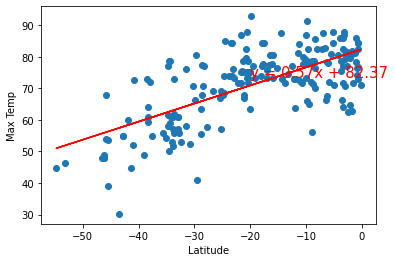

None


In [62]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp")
print(linear_reg(x_values,y_values))

In [ ]:
#note how as you move closer to the Equator the max temp rises

The r-squared is: 0.1410581087704037


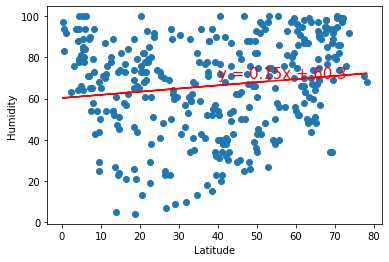

None


In [63]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity")
print(linear_reg(x_values,y_values))

In [ ]:
#humidity does not have a noticable trend in the northern hemisphere

The r-squared is: 0.22078604161929338


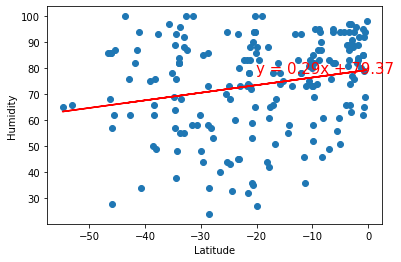

None


In [65]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plt.ylabel("Humidity")
print(linear_reg(x_values,y_values))

In [ ]:
#however in the southern hemisphere it does trend positively when approaching the Equator

The r-squared is: 0.12259668105456656


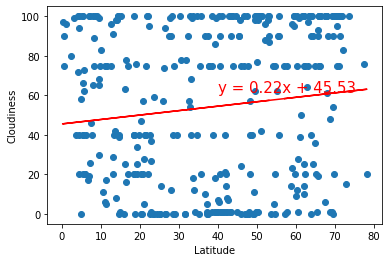

None


In [68]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg(x_values,y_values))

In [ ]:
#no trend

The r-squared is: 0.2672655794705813


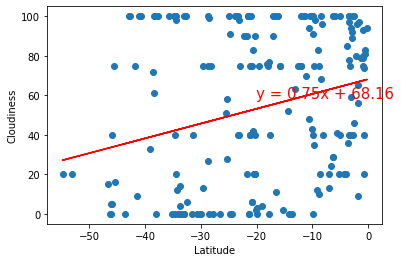

None


In [69]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg(x_values,y_values))

In [ ]:
#a trend towards more clouds as you move closer to the equator

The r-squared is: 0.10852702499674963


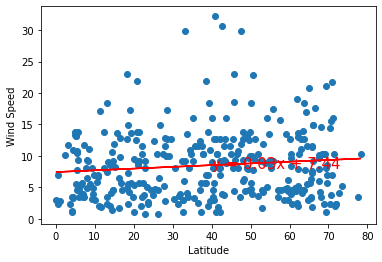

None


In [70]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg(x_values,y_values))

In [ ]:
#no trend

The r-squared is: -0.10761527771901766


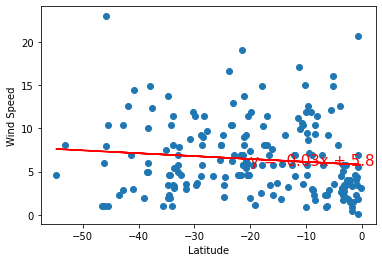

None


In [71]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg(x_values,y_values))

In [ ]:
#no trend